##### <div style="font-size: 0.8em; color: #444;line-height: 1.1;">
  
<br>
 
<strong>DISCLAIMER:</strong>  This notebook demonstrates usage of **CARTMAN** through a novel motif co-occurance analysis of previously published data. It is provided under the terms of the MIT License, distributed "as is", WITHOUT WARRANTY OF ANY KIND, express or implied. For the most up-to-date version of this document and the CARTMAN tool, please visit <a href="https://github.com/psaisan/CARTMAN"> github.com/psaisan/CARTMAN </a>.
</div>

<br>

<div style="background-color: #FFF; border: 2px solid #333333; padding: 10px;font-size: 0.8em;font-family: Arial, sans-serif;">  
<h1>Motif Co-occurrences in Shifting Epigenetic Landscapes: CARTMAN Analysis of Epigenetic Reprogramming in Kupffer Cell Transition from Healthy to Metabolic Dysfunction-associated Steatohepatitis (MASH)</h1>
</div>

<br>
       
As outlined in  <a href="https://pubmed.ncbi.nlm.nih.gov/32362324/"> Seidman et al</a>, using transcriptomic data <a href="https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE128338"> (GSE128338)</a> associated with Fig 5B, we defined putative distal regulatory elements by annotating open regions of chromatin determined by ATAC seq with local (1000bp window) Histone H3K27 acetylation (H3K27ac) determined by ChIP seq in Kupffer cells isolated from healthy mice or from mice fed a diet that induces metabolic dysfunction associated hepatosteatosis (MASH). We observed 3717 regions that exhibited a more than 2-fold increase in H3K27ac and more than 2678 regions exhibiting more than a 2-fold decrease in acetylation (FDR <0.05) in Kupffer cells isolated from mice fed the MASH-inducing diet.  




These changes in H3K27ac were associated with corresponding up or down regulation of nearby genes, respectively.  Motif enrichment analysis of DNA sequences of ATAC peaks associated with gain or loss of acetylation resulted in identification in each case of more than 20 motifs that were significantly enriched in comparison to GC matched background, nominating candidate transcription factors as drivers of the changes in H3K27ac. Among these, motifs for Kupffer cell lineage determining factors PU.1/SpiB, IRFs, LXR and TEF were identified as the most enriched motifs in ATAC peaks exhibiting reduced H3K27ac, whereas motifs for PU.1, ATF3, AP-1 and MITF were the most enriched motifs in ATAC peaks exhibiting increased H3K27ac. These motifs are, therefore, among the limited target motif set used in co-occurance analysis below (motif_list_file).

To investigate the possibility that these overlapping motifs are used in different **combinations** to drive the patterns of observed acetylation in healthy vs MASH Kupffer cells, we analyzed, using CARTMAN below, the frequencies of all possible combinations of target set motifs in each of the peak sets. This analysis helped reveal that the combination of an ATF3 motif with any of the other factors was significantly over represented in the peaks gaining H3K27ac Kupffer cells isolated from mice fed the MASH-inducing diet. In contrast, combinations of  motifs for Kupffer cell lineage determining factors but lacking the ATF3 motif were significantly enriched in peaks that exhibited loss of H3K27ac in the context of the MASH diet.  Of interest, the motifs associated with motifs recognized by LXR, (LXRE and LXR half site) changed from motifs being recognized by other Kupffer cell lineage determining factors in healthy Kupffer cells to combinations containing the ATF3 motif in Kupffer cells isolated from mice fed the MASH diet. These findings are consistent with marked up regulation of ATF3 in Kupffer cells fed the MASH diet and its binding to genomic regions exhibiting increased H3K27ac in conjunction with co-binding of LXRs. 

<br>

</div>



In [1]:
import sys
import os

# Add the src directory to the Python path
current_dir = os.getcwd()
sys.path.append(os.path.dirname(current_dir))
sys.path.append(os.path.dirname(current_dir)+'/src/')
os.environ["PATH"] += "/bioinformatics/homer/bin:"


# Imports from motif_utils.py
from src.motif_utils import (
    read_motif_headers,
    is_denovo_motif_file,
    read_motif_headers_jaspar,
    read_motif_headers_homer
)

# Imports from HOMER_utils.py
from src.HOMER_utils import get_motif_count

# Imports from combination_utils.py
from src.combination_utils import (
    all_possible_combinations33,
    transform_combinations_to_matrix,
    calculate_all_motif_co_occurrences
)

# Imports from peak_motif_analysis.py
from src.peak_motif_sets import peak_motif_sets


DENOVO HOMER
Motif_Count_File= /home/psaisan/code/data/motifCount_counts_KCN_H3K_FC2_1000_w200_KCH_VS_KCN_w400_L70.txt Force= True
annotatePeaks.pl /home/psaisan/code//data/KCN_H3K_FC2_1000_w200.txt mm10 -cpu 12 -noann -nogene -m /home/psaisan/code//data/KCH_VS_KCN_w400_L70.motifs -nmotifs > /home/psaisan/code/data/motifCount_counts_KCN_H3K_FC2_1000_w200_KCH_VS_KCN_w400_L70.txt
Generating /home/psaisan/code/data/motifCount_counts_KCN_H3K_FC2_1000_w200_KCH_VS_KCN_w400_L70.txt



	Peak file = /home/psaisan/code//data/KCN_H3K_FC2_1000_w200.txt
	Genome = mm10
	Organism = mouse
	Will use up to 12 CPUs in parts that can use them
	Will Skip peak annotation
	Will Skip closest gene annotation
	Motif files:
		/home/psaisan/code//data/KCH_VS_KCN_w400_L70.motifs	-m
	Will report the number of motifs in each peak
	Peak/BED file conversion summary:
		BED/Header formatted lines: 0
		peakfile formatted lines: 3717
		Duplicated Peak IDs: 0

	Peak File Statistics:
		Total Peaks: 3717
		Redundant Peak IDs: 0
		Peaks lacking information: 0 (need at least 5 columns per peak)
		Peaks with misformatted coordinates: 0 (should be integer)
		Peaks with misformatted strand: 0 (should be either +/- or 0/1)

	Peak file looks good!

	Extracting Sequence...
	Custom genome sequence directory: /bioinformatics/homer_4.10//data/genomes/mm10/

	Extracting sequences from directory: /bioinformatics/homer_4.10//data/genomes/mm10/
	Extracting 234 sequences from chr1
	Extracting 316 sequences from c

Save results in : /home/psaisan/code//results/Peak1_table.txt
DENOVO HOMER
Motif_Count_File= /home/psaisan/code/data/motifCount_counts_KCH_H3K_FC2_1000_w200_KCH_VS_KCN_w400_L70.txt Force= True
annotatePeaks.pl /home/psaisan/code//data/KCH_H3K_FC2_1000_w200.txt mm10 -cpu 12 -noann -nogene -m /home/psaisan/code//data/KCH_VS_KCN_w400_L70.motifs -nmotifs > /home/psaisan/code/data/motifCount_counts_KCH_H3K_FC2_1000_w200_KCH_VS_KCN_w400_L70.txt
Generating /home/psaisan/code/data/motifCount_counts_KCH_H3K_FC2_1000_w200_KCH_VS_KCN_w400_L70.txt



	Peak file = /home/psaisan/code//data/KCH_H3K_FC2_1000_w200.txt
	Genome = mm10
	Organism = mouse
	Will use up to 12 CPUs in parts that can use them
	Will Skip peak annotation
	Will Skip closest gene annotation
	Motif files:
		/home/psaisan/code//data/KCH_VS_KCN_w400_L70.motifs	-m
	Will report the number of motifs in each peak
	Peak/BED file conversion summary:
		BED/Header formatted lines: 0
		peakfile formatted lines: 2678
		Duplicated Peak IDs: 0

	Peak File Statistics:
		Total Peaks: 2678
		Redundant Peak IDs: 0
		Peaks lacking information: 0 (need at least 5 columns per peak)
		Peaks with misformatted coordinates: 0 (should be integer)
		Peaks with misformatted strand: 0 (should be either +/- or 0/1)

	Peak file looks good!

	Extracting Sequence...
	Custom genome sequence directory: /bioinformatics/homer_4.10//data/genomes/mm10/

	Extracting sequences from directory: /bioinformatics/homer_4.10//data/genomes/mm10/
	Extracting 183 sequences from chr1
	Extracting 214 sequences from c

Save results in : /home/psaisan/code//results/Peak2_table.txt


/gpfs/data01/glasslab/home/psaisan/.local/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  func(*args, **kwargs)
/gpfs/data01/glasslab/home/psaisan/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


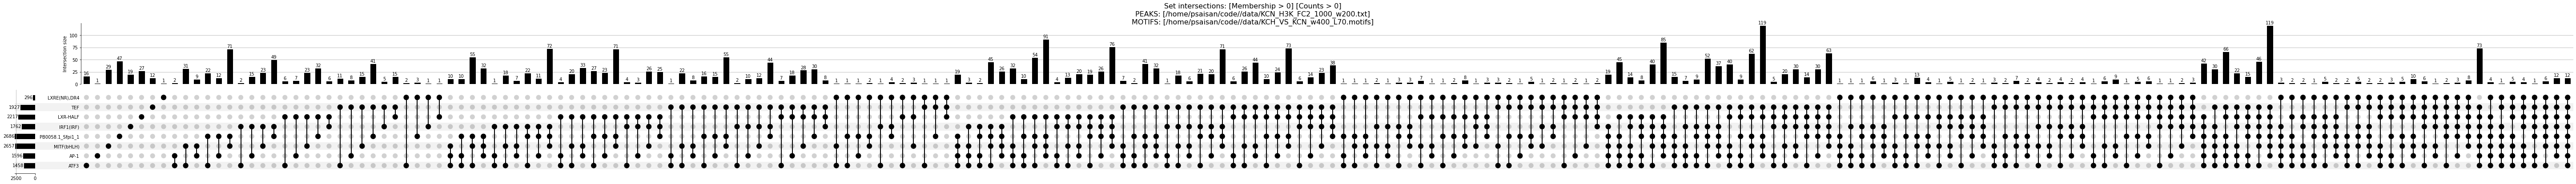

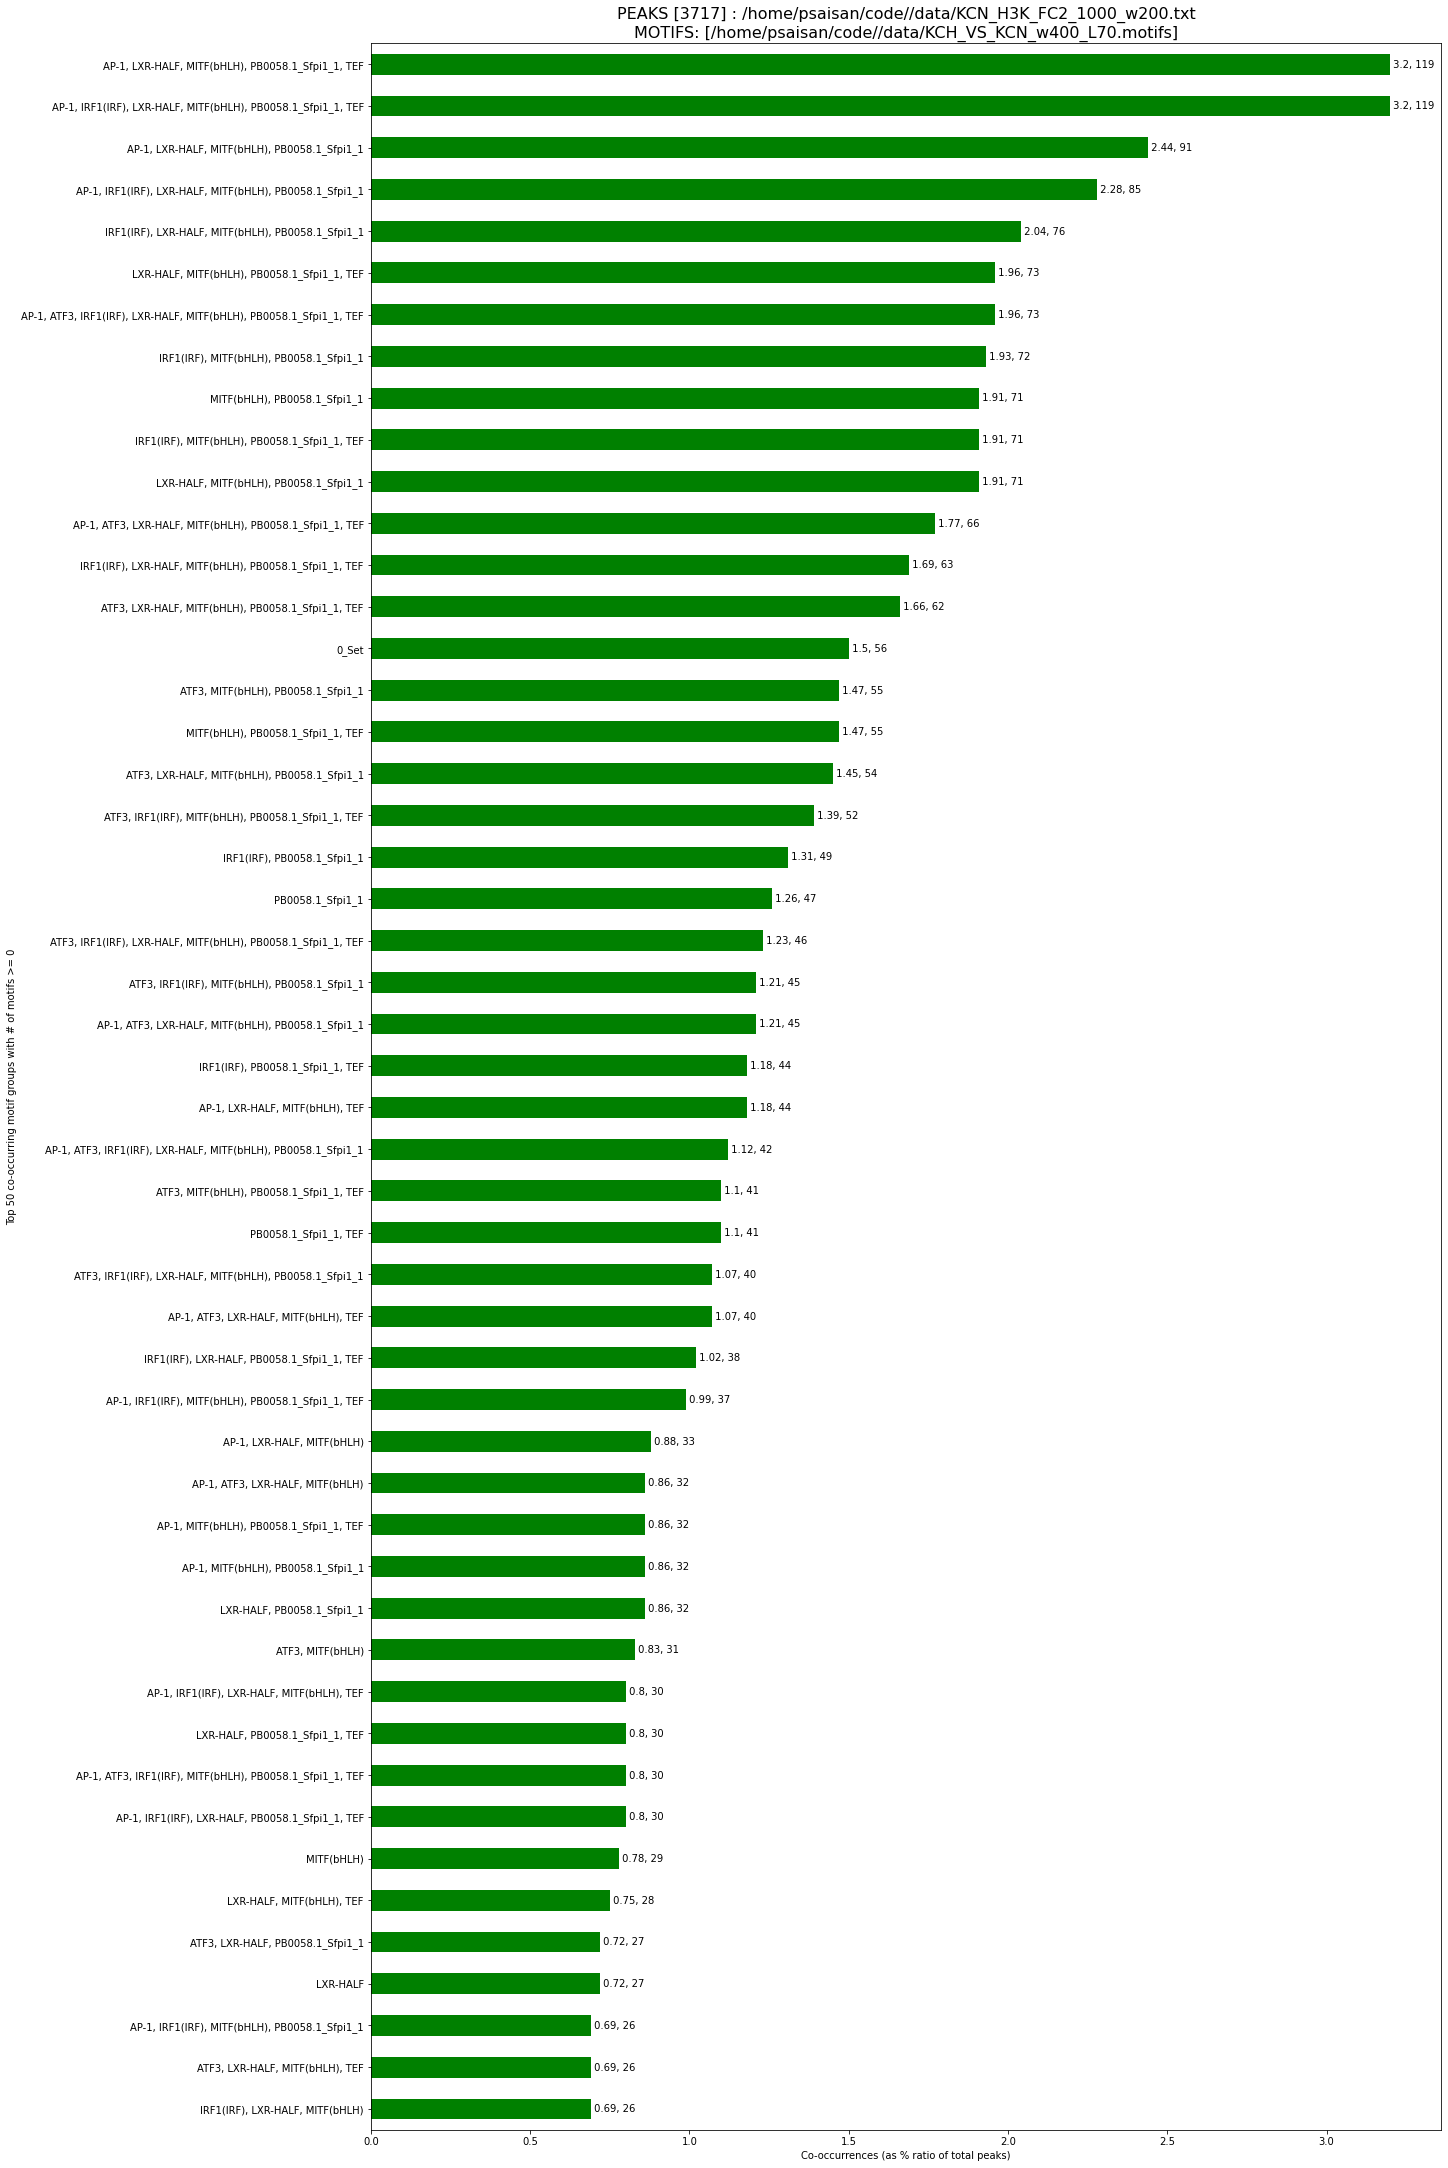

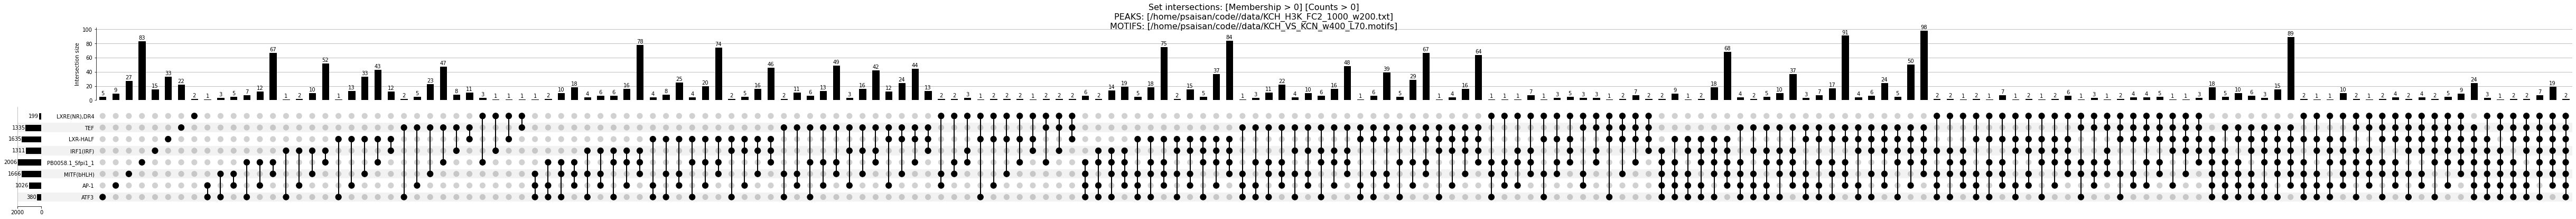

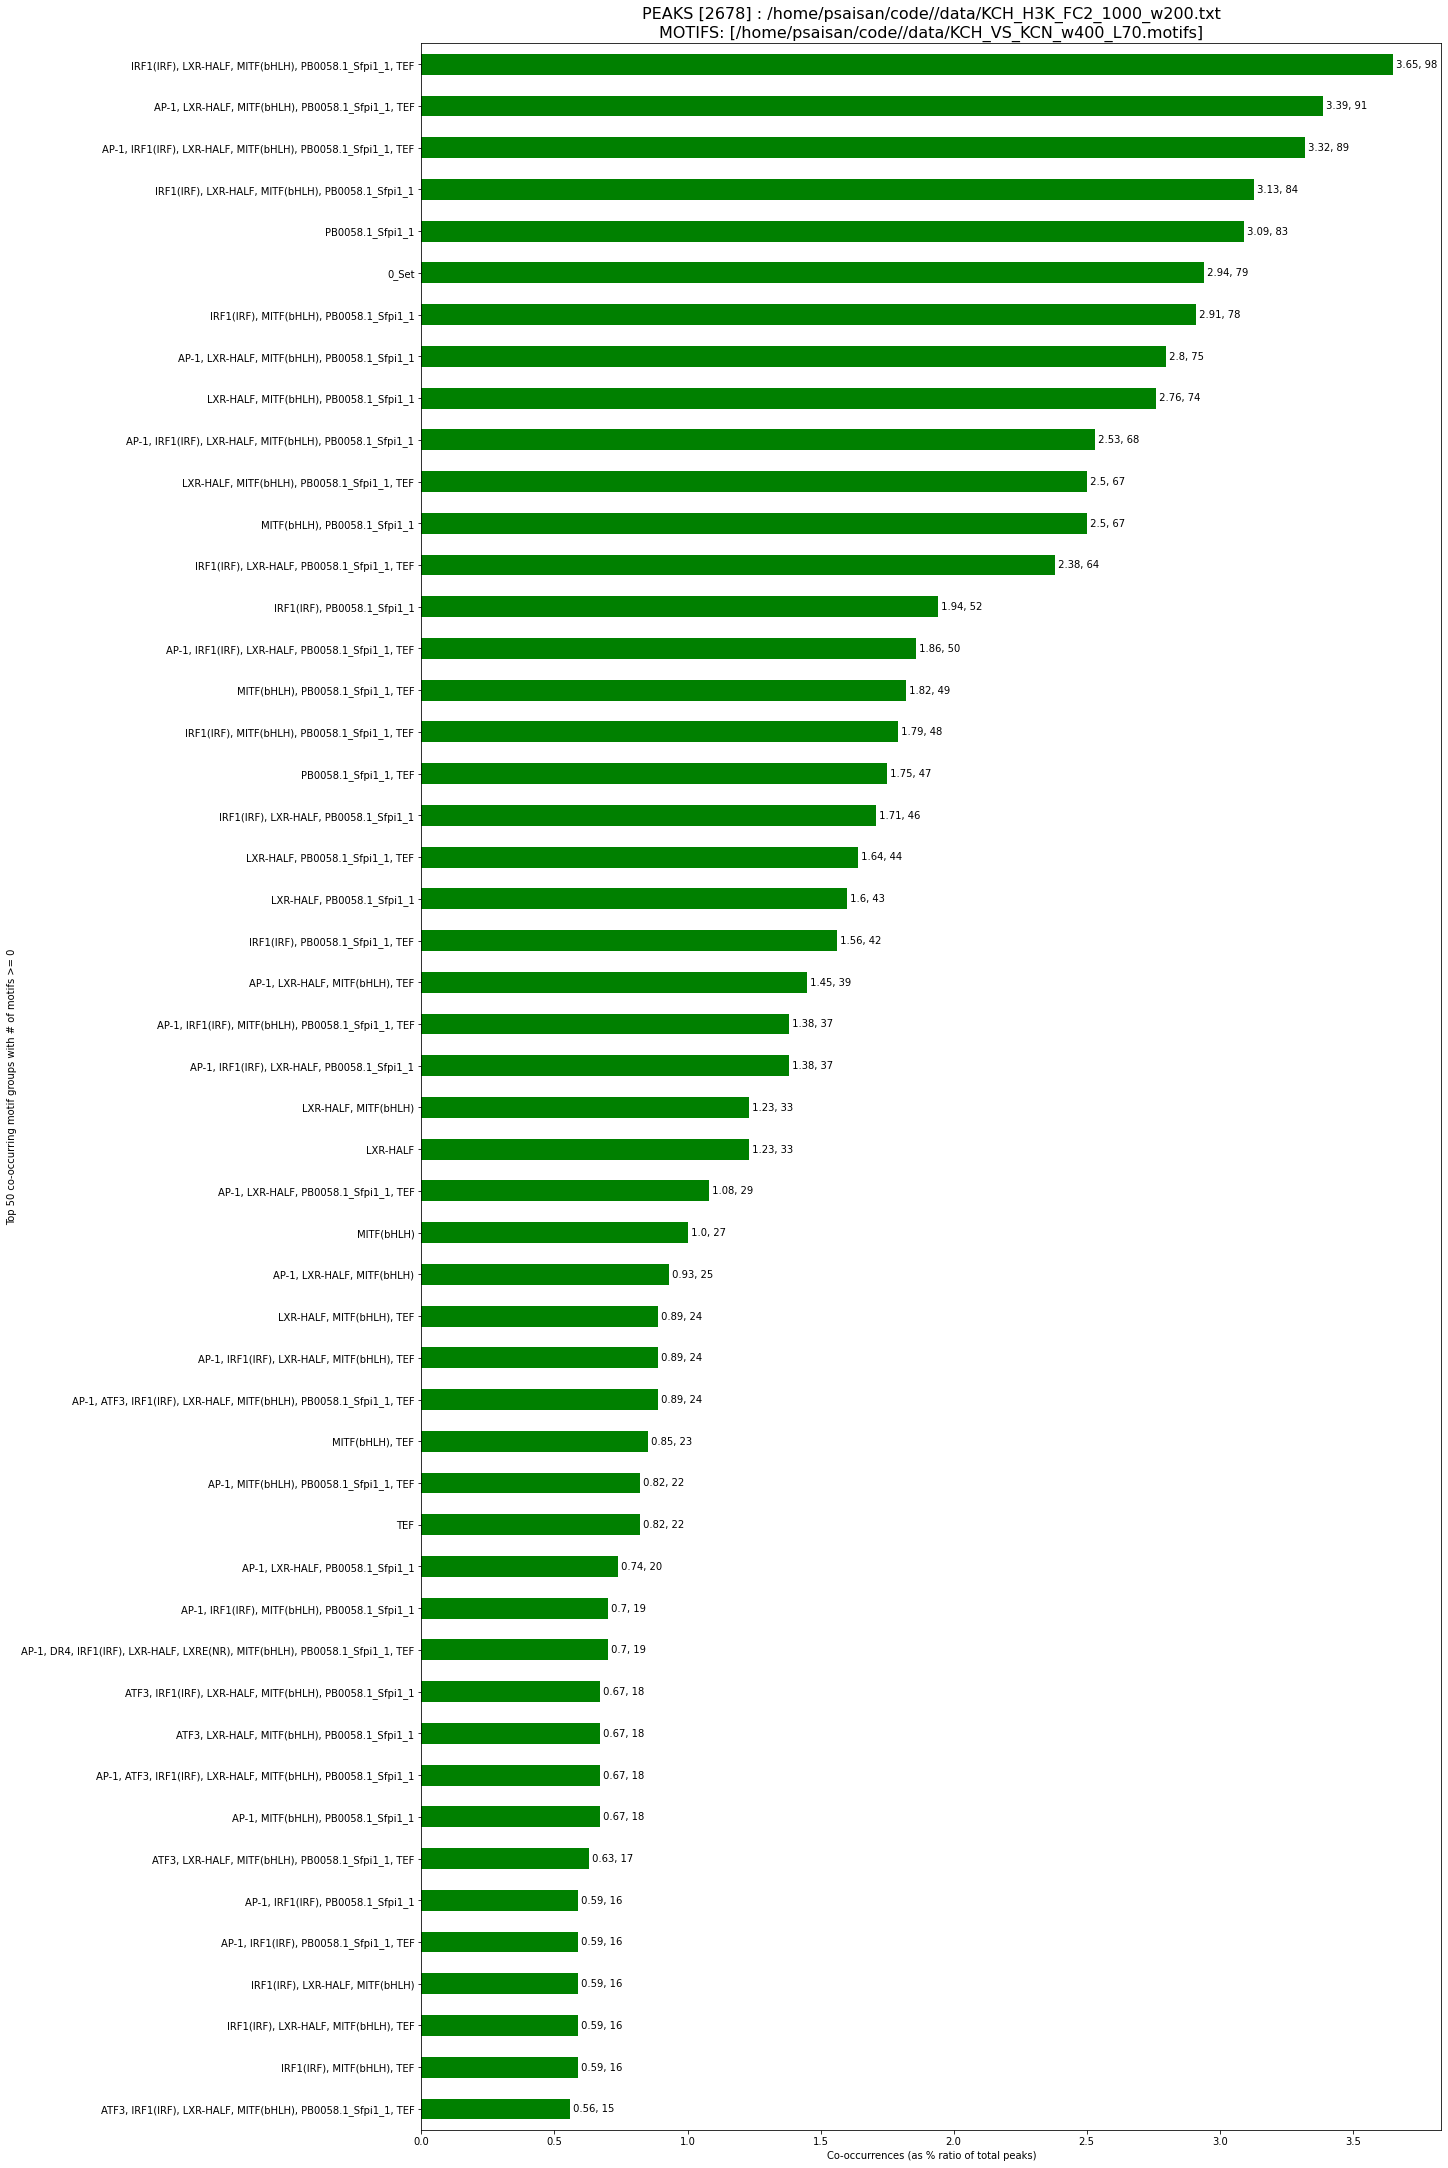

In [31]:
from upsetplot import plot
import matplotlib.pyplot as plt
import os
import pandas as pd

# -------------------------
# Configuration and Setup
# -------------------------

# Base directory path for data and outputs

cwd= os.getcwd()
cwd='/home/psaisan/code/'

base_dir_in=cwd+'/data/'
base_dir_out=cwd+'/results/'


# Genome reference
GENOME = 'mm10'

# Motif list file path
motif_list_file = os.path.join(base_dir_in, 'KCH_VS_KCN_w400_L70.motifs')

# Peak files
peak_file1 = os.path.join(base_dir_in, 'KCN_H3K_FC2_1000_w200.txt')
peak_file2 = os.path.join(base_dir_in, 'KCH_H3K_FC2_1000_w200.txt')

# Output directories
output_directory1 = os.path.join(base_dir_out, 'Example_Peak1/')
output_directory2 = os.path.join(base_dir_out, 'Example_Peak2/')

# CSV output paths for Peak 1 and 2
csv_out_file1 = os.path.join(base_dir_out, 'Peak1_table.txt')
csv_out_file2 = os.path.join(base_dir_out, 'Peak2_table.txt')

# Image output base paths
fig_output_path1 = os.path.join(base_dir_out, 'Peak1.png')  # Function appends _upset.png and _bar.png
fig_output_path2 = os.path.join(base_dir_out, 'Peak2.png')  # Function appends _upset.png and _bar.png


# Parameters with default values
motif_recount = True
seperate_duplicates = False
min_motif_set_count = 0
min_subset_count = 0

# -------------------------
# Processing Peak File 1
# -------------------------

# Call the peak_motif_sets function with appropriate parameters
dp1, bdf1 = peak_motif_sets(
    peak_file=peak_file1,
    genome=GENOME,
    motif_list_file=motif_list_file,
    Motif_recount=motif_recount,
    seperate_duplicates=seperate_duplicates,
    min_motif_set_count=min_motif_set_count,
    min_subset_count=min_subset_count,
    output_file=fig_output_path1
)

 

# Save the binary table to a CSV file for Peak 1
print('Save results in :',csv_out_file1)
bdf1.to_csv(csv_out_file1, sep='\t')

# -------------------------
# Processing Peak File 2
# -------------------------

# Call the peak_motif_sets function with appropriate parameters
dp2, bdf2 = peak_motif_sets(
    peak_file=peak_file2,
    genome=GENOME,
    motif_list_file=motif_list_file,
    Motif_recount=motif_recount,
    seperate_duplicates=seperate_duplicates,
    min_motif_set_count=min_motif_set_count,
    min_subset_count=min_subset_count,
    output_file=fig_output_path2
)


# Save the binary table to a CSV file for Peak 2
print('Save results in :',csv_out_file2)
bdf2.to_csv(csv_out_file2, sep='\t')


In [32]:
# Inspect results: motif combinations table
print('===')
print('Motif co-occurance counts (normalized %) for '+peak_file1)
print('===')
print(dp1)

print('===')
print('Outuput File : ',csv_out_file1)
print('===')
display(pd.read_csv(csv_out_file1,delimiter='\t'))


===
Motif co-occurance counts (normalized %) for /home/psaisan/code//data/KCN_H3K_FC2_1000_w200.txt
===
IRF1(IRF), LXR-HALF, MITF(bHLH)                                       0.69
ATF3, LXR-HALF, MITF(bHLH), TEF                                       0.69
AP-1, IRF1(IRF), MITF(bHLH), PB0058.1_Sfpi1_1                         0.69
LXR-HALF                                                              0.72
ATF3, LXR-HALF, PB0058.1_Sfpi1_1                                      0.72
LXR-HALF, MITF(bHLH), TEF                                             0.75
MITF(bHLH)                                                            0.78
AP-1, IRF1(IRF), LXR-HALF, PB0058.1_Sfpi1_1, TEF                      0.80
AP-1, ATF3, IRF1(IRF), MITF(bHLH), PB0058.1_Sfpi1_1, TEF              0.80
LXR-HALF, PB0058.1_Sfpi1_1, TEF                                       0.80
AP-1, IRF1(IRF), LXR-HALF, MITF(bHLH), TEF                            0.80
ATF3, MITF(bHLH)                                                      0

,PeakID,ATF3,AP-1,MITF(bHLH),PB0058.1_Sfpi1_1,IRF1(IRF),LXR-HALF,TEF,"LXRE(NR),DR4"
0,Merged-chrUn_GL456389-10653-2,0,1,1,0,1,0,0,0
1,Merged-chr9-35305408-2,0,1,0,0,1,0,1,0
2,Merged-chr14-19417842-2,0,1,0,1,1,0,1,0
3,Merged-chr2-134644199-2,0,0,1,0,0,1,1,0
4,Merged-chr9-3002152-2,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
3712,Merged-chr8-10848293-1,0,1,0,1,1,0,0,0
3713,Merged-chr9-69454384-1,1,0,0,1,0,1,0,0
3714,Merged-chr10-120980286-1,0,1,0,1,0,1,1,0
3715,Merged-chr8-126588056-1,0,1,1,0,0,1,0,0
